#Week 2 Lab: Perceptron by hand

In this example, we will implement perceptron from scratch using only base pythong and numpy. 


In [73]:
########## Answer ##########
# Adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
# Helper function
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_learning_curve(train_scores, title=None, ylim=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Epochs")
    plt.ylabel("Loss Value")
    plt.grid()
    plt.plot(range(len(train_scores)), train_scores, '-', color="r",
             label="Training score")

    plt.legend(loc="best")
    plt.show()

## Question 1: Learning the OR function with a perceptron

Here we will implement a perceptron from scratch. We will start with defining four data points as the input and build a perceptron to model them. The goal is to have the perceptron learn the __OR__ function.

In [74]:
# import numpy and define the input data
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 1]) 

print(f'This is the X matrix {X}')

This is the X matrix [[0 0]
 [0 1]
 [1 0]
 [1 1]]


##The forward and backwards pass

Here we will implement a perceptron from scratch. We first need to compute the __forward pass__ of the perceptron, which is given by:


$$\phi(w_1*x_{1i} + w_2*x_{2i} + b)$$

where $\phi(h)$ is the the _sigmoid_ transformation and can be computed as:

$$\phi(h) = \frac{1}{1+\exp(-h)}$$

In the example below, we will compute the forward pass for __all__ data points using a single matrix - vector multiplication. If weights $w_1, w_2$ are in a single vector $w$ we can multiply this vector with our $4x2$ $X$ matrix as follows:

$$ h = Xw  $$

We can then add our bias to $h$ and perform an element-wise sigmoid transformation to get a $4x1$ vector of output probabilities. 

Now, Recall that our gradients are for sample $i$ are given by:

$$\frac{\partial{l}}{\partial{w_{1}}} = (p - y)*p*(1-p)*x_{1i} \\
\frac{\partial{l}}{\partial{w_{2}}} = (p - y)*p*(1-p)*X_{2i} \\
\frac{\partial{l}}{\partial{b}} = (p - y)*p*(1-p)$$ \\

First, we're going to set up the forward pass. This function should take in the `X` matrix, the weights `w`, and the bias term `b` and returns a vector of prediction probabilities `p` for each sample in `X`. 

Fill in the function template below:

In [75]:
# The forward pass
# X: an n x d matrix of the input features + a column of all ones for the intercept term
# w: a d x 1 vector containing the weights for our peceptron
def forward_pass(X, w, b):
    h = np.dot(X,w) + b
    p = 1 / (1 + np.exp(-h))
    return p

Now the backward pass. The function should accept the label vector `y`, the data matrix `X`, and the vector of predicted probabilities `p`. Using the equations above, complete the backward pass function. 

In [76]:
# The backward pass
# X: the design matrix of the input features
# y: the ground truth of outcome labels (classes)
# p: the class probability outputted by the model

def backward_pass(y, X, p):
    # Your code for the gradients goes below:
    grad_w1 = (p-y) * p * (1-p) * X[:, 0]
    grad_w2 = (p-y) * p * (1-p) * X[:, 1]
    grad_b = (p-y) * p * (1-p)
    # Average the gradients
    grad_w1 = grad_w1.mean()
    grad_w2 = grad_w2.mean()
    grad_b = grad_b.mean()
    
    return grad_w1, grad_w2, grad_b


Now we are going to put it all together and come up with function that will train our perceptron. Please fill out the incomplete lines to complete the function

In [77]:
# One possible implementation is as below
############################################################
def train(X, y, w, b, iters, lr=1):
    w_new = np.copy(w)
    b_new = np.copy(b)
    loss = []
    for i in range(iters):
        # preds is a 4x1 vector of probabilities
        p = forward_pass(X, w_new, b_new)
        # Now we want to com
        grad_w1, grad_w2, grad_b = backward_pass(y, X, p)
        
        # Now do the gradient descent updates using the average gradient from all four samples
        w_new[0] = w_new[0] - lr*grad_w1
        w_new[1] = w_new[1] - lr*grad_w2
        b_new = b_new - lr*grad_b

        # Calculate the loss
        mse = ((y - p)**2).mean()
        loss.append(mse)
        acc = len(np.where(np.round(p) == y)[0])/float(len(y))
        # Print out some info 
        if i % 10 == 0:
          print("Loss at iteration " + str(i) + ": " + str(np.mean(mse)) + '\t' + "Accuracy: " + str(acc))
    
    return w_new, b_new, loss

Now we are ready to train! Assuming we've done everything correctly the following should run and result in final values for the weights.

Loss at iteration 0: 0.2766940333792591	Accuracy: 0.5
Loss at iteration 10: 0.23041151323691078	Accuracy: 0.5
Loss at iteration 20: 0.1983175129294658	Accuracy: 0.5
Loss at iteration 30: 0.17455351013801818	Accuracy: 0.5
Loss at iteration 40: 0.1557709078678609	Accuracy: 0.75
Loss at iteration 50: 0.14051503244498578	Accuracy: 0.75
Loss at iteration 60: 0.1280069419165466	Accuracy: 1.0
Loss at iteration 70: 0.11765649697117814	Accuracy: 1.0
Loss at iteration 80: 0.10898579325278339	Accuracy: 1.0
Loss at iteration 90: 0.10162124003909748	Accuracy: 1.0


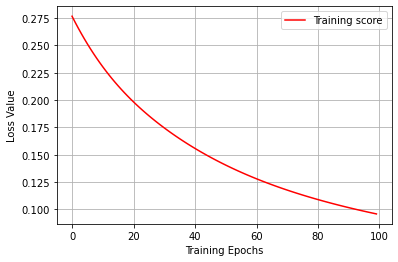

In [92]:
# Initialize the weights and train the model
w = np.array([1.,-1.])
b = 0.
w_new, w_b, loss = train(X, y, w, b, iters=100, lr=1)
plot_learning_curve(loss)

## Question 2: Learning the AND function

Because we've written our functions in a modular way, we can easily repurose them to learn on new data. Next, we will train our perceptron to learn the AND function. Give the code a try again on the new data for the AND function.

Loss at iteration 0: 0.2766940333792591	Accuracy: 0.5
Loss at iteration 10: 0.23041151323691078	Accuracy: 0.5
Loss at iteration 20: 0.1983175129294658	Accuracy: 0.5
Loss at iteration 30: 0.17455351013801818	Accuracy: 0.5
Loss at iteration 40: 0.1557709078678609	Accuracy: 0.75
Loss at iteration 50: 0.14051503244498578	Accuracy: 0.75
Loss at iteration 60: 0.1280069419165466	Accuracy: 1.0
Loss at iteration 70: 0.11765649697117814	Accuracy: 1.0
Loss at iteration 80: 0.10898579325278339	Accuracy: 1.0
Loss at iteration 90: 0.10162124003909748	Accuracy: 1.0
Loss at iteration 100: 0.09527891612064196	Accuracy: 1.0
Loss at iteration 110: 0.08974560174974944	Accuracy: 1.0
Loss at iteration 120: 0.08486137764949894	Accuracy: 1.0
Loss at iteration 130: 0.08050567387427979	Accuracy: 1.0
Loss at iteration 140: 0.0765867370130853	Accuracy: 1.0
Loss at iteration 150: 0.07303390805494192	Accuracy: 1.0
Loss at iteration 160: 0.0697920396644601	Accuracy: 1.0
Loss at iteration 170: 0.06681748085904057	Acc

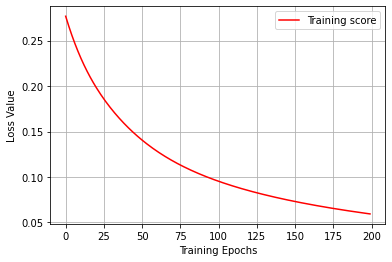

In [93]:
# New data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1]) 

# Reinitialize the weights and train the model
w = np.array([1.,-1.])
b = 0.
w_new, w_b, loss = train(X, y, w, b, iters=200, lr=1)
plot_learning_curve(loss)

## Question 3: (Trying to) Learn the XOR function

Now we are going train our model on data for the XOR function. Run the code below and verify if it converges. If it doesn't, what do you think is the problem?

Loss at iteration 0: 0.2766940333792591	Accuracy: 0.75
Loss at iteration 10: 0.2700164115417251	Accuracy: 0.75
Loss at iteration 20: 0.2667485028069049	Accuracy: 0.75
Loss at iteration 30: 0.26414881253013883	Accuracy: 0.75
Loss at iteration 40: 0.2617532634280848	Accuracy: 0.75
Loss at iteration 50: 0.2595563027762513	Accuracy: 0.75
Loss at iteration 60: 0.2576117365783659	Accuracy: 0.75
Loss at iteration 70: 0.2559539615982568	Accuracy: 0.75
Loss at iteration 80: 0.25458699128623724	Accuracy: 0.75
Loss at iteration 90: 0.25349065933762666	Accuracy: 0.75


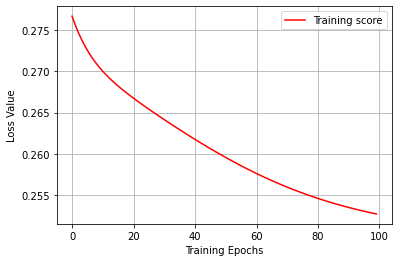

In [95]:
# New data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0]) 

# Reinitialize the weights and train the model
w = np.array([1.,-1.])
b = 0.
w_new, w_b, loss = train(X, y, w, b, iters=100, lr=1)
plot_learning_curve(loss)